# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_f20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [2]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,465,82,43,71,154,68,7,150,45,19,143,171,330,173,78,7,11,181,186
1,55,94,36,66,151,61,8,133,50,18,135,154,265,119,62,9,3,201,208
2,653,97,41,92,197,63,10,179,37,21,140,197,481,136,63,4,3,197,204
3,12,88,46,74,171,68,6,152,43,19,148,180,349,192,71,5,11,189,195
4,505,115,53,100,205,64,11,220,30,25,166,229,710,214,71,21,11,189,199
5,330,98,44,78,160,63,8,142,47,18,148,160,300,171,63,19,2,201,207
6,772,92,52,93,204,67,9,189,35,22,161,214,536,240,72,2,5,188,195
7,806,88,45,82,155,56,8,154,43,19,149,180,357,170,69,3,0,188,193
8,538,101,49,103,212,67,10,201,33,23,156,215,601,174,69,4,11,189,196
9,368,84,45,68,148,64,6,146,46,19,142,168,317,180,75,5,1,183,187


Methods `describe` and `info` deliver some useful information.

In [3]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,423.759563,94.081967,45.030965,82.806922,170.034608,61.677596,8.573770,170.495446,40.561020,20.712204,148.313297,190.014572,448.628415,175.579235,72.466302,6.371585,12.752277,188.892532,195.542805
std,245.197307,8.299735,6.210492,16.049395,33.415170,7.582146,4.521696,33.633578,7.846521,2.623076,14.590525,31.007118,178.964225,32.935011,6.877264,4.893053,9.030192,6.056103,7.405394
min,0.000000,73.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,61.000000,0.000000,0.000000,176.000000,181.000000
25%,211.000000,88.000000,40.000000,70.000000,144.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,168.000000,321.000000,151.000000,68.000000,2.000000,5.000000,185.000000,191.000000
50%,421.000000,93.000000,44.000000,80.000000,170.000000,62.000000,8.000000,157.000000,42.000000,20.000000,146.000000,180.000000,367.000000,173.000000,71.000000,6.000000,11.000000,188.000000,197.000000
75%,640.000000,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,201.000000,46.000000,23.000000,160.000000,218.000000,607.000000,200.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,843.000000,117.000000,58.000000,112.000000,322.000000,133.000000,55.000000,262.000000,61.000000,28.000000,188.000000,285.000000,998.000000,268.000000,119.000000,22.000000,41.000000,206.000000,211.000000


In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int32
1     549 non-null int32
2     549 non-null int32
3     549 non-null int32
4     549 non-null int32
5     549 non-null int32
6     549 non-null int32
7     549 non-null int32
8     549 non-null int32
9     549 non-null int32
10    549 non-null int32
11    549 non-null int32
12    549 non-null int32
13    549 non-null int32
14    549 non-null int32
15    549 non-null int32
16    549 non-null int32
17    549 non-null int32
18    549 non-null int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [5]:
means=X_train_pd.mean() # Найдем мат. ожидание### YOUR CODE HERE
stds=X_train_pd.std() # Найдем стандартное отклонение
cols=X_train_pd.columns
for col, mean, std in zip(cols,means, stds):
    X_train_pd[col]= (X_train_pd[col]-mean)/std #вычтем среднее и разделим на стандартное отклонение

In [6]:
X_train_pd.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.168193,-1.455705,-0.327022,-0.735661,-0.479860,0.833854,-0.348049,-0.609375,0.565726,-0.652747,-0.364161,-0.613232,-0.662861,-0.078313,0.804636,0.128430,-0.194046,-1.303236,-1.288629
1,-1.503930,-0.009876,-1.454147,-1.047200,-0.569640,-0.089367,-0.126893,-1.114822,1.202951,-1.033979,-0.912462,-1.161494,-1.026062,-1.717905,-1.521870,0.537173,-1.079963,1.999218,1.682179
2,0.934922,0.351581,-0.649057,0.572799,0.806981,0.174410,0.315419,0.252859,-0.453834,0.109717,-0.569774,0.225285,0.180883,-1.201737,-1.376463,-0.484684,-1.079963,1.338727,1.142032
3,-1.679299,-0.732791,0.156032,-0.548739,0.028891,0.833854,-0.569205,-0.549910,0.310836,-0.652747,-0.021473,-0.322977,-0.556695,0.498581,-0.213210,-0.280313,-0.194046,0.017745,-0.073299
4,0.331327,2.520325,1.283157,1.071260,1.046393,0.306299,0.536575,1.471879,-1.345949,1.634644,1.212205,1.257306,1.460468,1.166563,-0.213210,2.989630,-0.194046,0.017745,0.466848


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr=LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)### YOUR CODE HERE
params={'C':(0.00001,0.0001,0.001,0.01,0.1,1), 'penalty':('l1','l2')}
lrg=GridSearchCV(lr, params, cv=3)
lrg.fit(X_train_pd,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=500,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': (1e-05, 0.0001, 0.001, 0.01, 0.1, 1),
                         'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [8]:
lrg.best_params_

{'C': 1, 'penalty': 'l2'}

In [9]:
from sklearn.model_selection import RandomizedSearchCV
lrrs=RandomizedSearchCV(lr, params, cv=3)
lrrs.fit(X_train_pd,y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=500,
                                                multi_class='multinomial',
                                                n_jobs=None, penalty='l2',
                                                random_state=None,
                                                solver='saga', tol=0.001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': (1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1),
                                        'penalty': ('l1', 'l2')},
                   pre_

In [10]:
lrrs.best_params_

{'penalty': 'l2', 'C': 1}

In [65]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot
import scikitplot


ModuleNotFoundError: No module named 'scikitplot'

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [11]:
### YOUR CODE HERE
from sklearn.decomposition import PCA

variance=[]
n_components=np.arange(1,19)
for i in range((X_train_pd.shape[1]-1)):
    pc=PCA(n_components=i+1)
    pc.fit(X_train)
    variance.append(1-pc.explained_variance_ratio_.sum())

Populating the interactive namespace from numpy and matplotlib


C:\Users\User\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt', 'std', 'mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


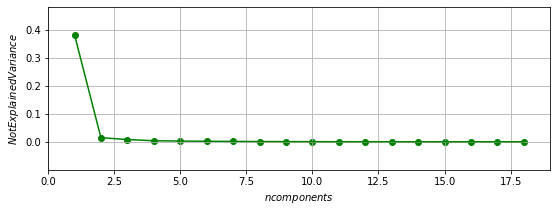

In [12]:
import matplotlib as plt
%pylab inline
plt.figure(figsize=(9, 3))
plt.title('')
plt.ylabel('$Not Explained Variance$')
plt.xlabel('$n components$')
plt.xlim(0, 19)
plt.ylim(min(variance)-0.1, max(variance)+0.1)
plt.scatter(n_components,np.array(variance), c='g')
plt.plot(n_components,np.array(variance), c='g', dash_joinstyle='round')

plt.grid()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [13]:
### YOUR CODE HERE
# Выбираем 2 компоненты, поскольку процент необъясненной дисперсии у них почти равен нуолю и следовательно они макисмально 
# передают информативность исходных признаков, при этом сильно понижая размерность
pc_opt=PCA(n_components=2)
pc_opt.fit(X_train)
X_train_2=pc_opt.fit_transform(X_train)
X_test_2=pc_opt.fit_transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [14]:
### YOUR CODE HERE
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import f1_score, accuracy_score
lr=LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)### YOUR CODE HERE
params={'C':(0.00001,0.0001,0.001,0.01,0.1,1), 'penalty':('l1','l2')}
lrg=GridSearchCV(lr, params,cv=3)
lrg.fit(X_train_2,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=500,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': (1e-05, 0.0001, 0.001, 0.01, 0.1, 1),
                         'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [15]:
optimal_hyperparameters_lr=lrg.best_params_
print('optimal hyperparameters: '+str(lrg.best_params_))
print('best score: '+str(lrg.best_score_) )


optimal hyperparameters: {'C': 0.0001, 'penalty': 'l1'}
best score: 0.3989071038251366


In [16]:
lr_opt=LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, 
                          max_iter=500, C=optimal_hyperparameters_lr['C'], penalty=optimal_hyperparameters_lr['penalty'])
lr_opt.fit(X_train_2,y_train)
y_pred=lr_opt.predict(X_test_2)
print('f1_score: ' + str(f1_score(y_test, y_pred, average='weighted')))
print('accuracy: '+ str(accuracy_score(y_test, y_pred)))

f1_score: 0.23096652802535156
accuracy: 0.36363636363636365


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [17]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
tree=DecisionTreeClassifier()
params={'max_depth':(1,2,3,4,5,6,7,8,9,12,14,16)}
tree_g=GridSearchCV(tree, params,cv=3)
tree_g.fit(X_train_2,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': (1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 14, 16)},
             pre_dispatch='2*n_jobs', refit=True, return

In [18]:
optimal_hyperparameters_tr=tree_g.best_params_ 
print('optimal hyperparameters: '+str(tree_g.best_params_))
print('best score: '+str(tree_g.best_score_) )

optimal hyperparameters: {'max_depth': 2}
best score: 0.5027322404371585


In [19]:
tree_opt=DecisionTreeClassifier(max_depth= optimal_hyperparameters_tr['max_depth'])
tree_opt.fit(X_train_2,y_train)
y_pred=tree_opt.predict(X_test_2)
print('f1_score: ' + str(f1_score(y_test, y_pred, average='weighted')))
print('accuracy: '+ str(accuracy_score(y_test, y_pred)))

f1_score: 0.32092949520175695
accuracy: 0.3872053872053872


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [20]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier
baglr=BaggingClassifier(lr)
n_est=list(np.arange(2,100,5))
n_est.append(100)
params={'n_estimators':n_est}
baglr_gs=GridSearchCV(baglr, params, scoring='accuracy',cv=3)
baglr_gs.fit(X_train_2,y_train)
optimal_hyperparameters_bg_lr_ac=baglr_gs.best_params_
print('optimal hyperparameters: '+str(baglr_gs.best_params_))
print('best score: '+str(baglr_gs.best_score_) )

optimal hyperparameters: {'n_estimators': 22}
best score: 0.40619307832422585


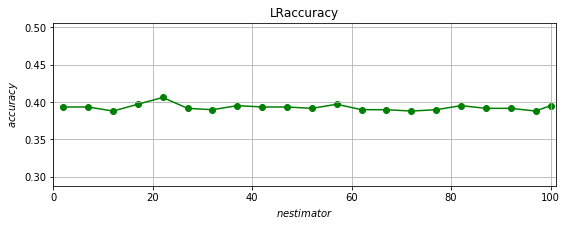

In [21]:
plt.figure(figsize=(9, 3))
plt.title('LRaccuracy')
plt.ylabel('$accuracy$')
plt.xlabel('$nestimator$')
plt.xlim(0, 101)
plt.ylim(min(baglr_gs.cv_results_['mean_test_score'])-0.1, max(baglr_gs.cv_results_['mean_test_score'])+0.1)
plt.scatter(n_est,baglr_gs.cv_results_['mean_test_score'], c='g')
plt.plot(n_est,baglr_gs.cv_results_['mean_test_score'], c='g', dash_joinstyle='round')

plt.grid()
plt.show()

In [22]:
baglr_gs=GridSearchCV(baglr, params, scoring='f1_weighted',cv=3)
baglr_gs.fit(X_train_2,y_train)
optimal_hyperparameters_bg_lr_f=baglr_gs.best_params_
print('optimal hyperparameters: '+str(baglr_gs.best_params_))
print('best score: '+str(baglr_gs.best_score_) )

optimal hyperparameters: {'n_estimators': 7}
best score: 0.3160851944106511


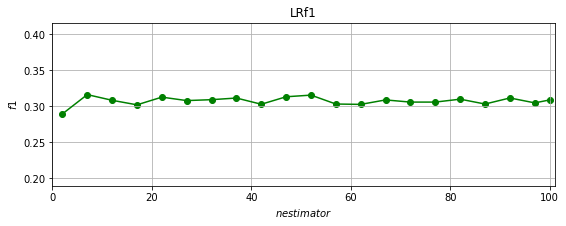

In [23]:
plt.figure(figsize=(9, 3))
plt.title('LRf1')
plt.ylabel('$f1$')
plt.xlabel('$nestimator$')
plt.xlim(0, 101)
plt.ylim(min(baglr_gs.cv_results_['mean_test_score'])-0.1, max(baglr_gs.cv_results_['mean_test_score'])+0.1)
plt.scatter(n_est,baglr_gs.cv_results_['mean_test_score'], c='g')
plt.plot(n_est,baglr_gs.cv_results_['mean_test_score'], c='g', dash_joinstyle='round')

plt.grid()
plt.show()

In [24]:
bagtree=BaggingClassifier(tree)
n_est=list(np.arange(2,100,5))
n_est.append(100)
params={'n_estimators':n_est}
bagtree_gs=GridSearchCV(bagtree, params,scoring='accuracy',cv=3)
bagtree_gs.fit(X_train_2,y_train)
optimal_hyperparameters_bg_tree_ac=bagtree_gs.best_params_
print('optimal hyperparameters: '+str(bagtree_gs.best_params_))
print('best score: '+str(bagtree_gs.best_score_) )

optimal hyperparameters: {'n_estimators': 72}
best score: 0.4517304189435337


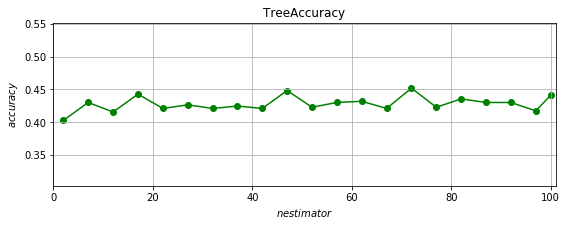

In [25]:
plt.figure(figsize=(9, 3))
plt.title('TreeAccuracy')
plt.ylabel('$accuracy$')
plt.xlabel('$nestimator$')
plt.xlim(0, 101)
plt.ylim(min(bagtree_gs.cv_results_['mean_test_score'])-0.1, max(bagtree_gs.cv_results_['mean_test_score'])+0.1)
plt.scatter(n_est,bagtree_gs.cv_results_['mean_test_score'], c='g')
plt.plot(n_est,bagtree_gs.cv_results_['mean_test_score'], c='g', dash_joinstyle='round')

plt.grid()
plt.show()

In [26]:
bagtree_gs=GridSearchCV(bagtree, params,scoring='f1_weighted',cv=3)
bagtree_gs.fit(X_train_2,y_train)
optimal_hyperparameters_bg_tree_f=bagtree_gs.best_params_
print('optimal hyperparameters: '+str(bagtree_gs.best_params_))
print('best score: '+str(bagtree_gs.best_score_) )

optimal hyperparameters: {'n_estimators': 32}
best score: 0.44936956349786583


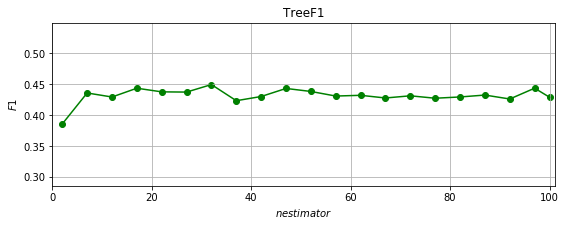

In [27]:
plt.figure(figsize=(9, 3))
plt.title('TreeF1')
plt.ylabel('$F1$')
plt.xlabel('$nestimator$')
plt.xlim(0, 101)
plt.ylim(min(bagtree_gs.cv_results_['mean_test_score'])-0.1, max(bagtree_gs.cv_results_['mean_test_score'])+0.1)
plt.scatter(n_est,bagtree_gs.cv_results_['mean_test_score'], c='g')
plt.plot(n_est,bagtree_gs.cv_results_['mean_test_score'], c='g', dash_joinstyle='round')

plt.grid()
plt.show()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [28]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
rf=RandomForestClassifier()
n_est=list(np.arange(50,1000,50))
params={'n_estimators':n_est}
rf_gs=GridSearchCV(rf, params,scoring='accuracy',cv=3)
rf_gs.fit(X_train_2,y_train)
optimal_hyperparameters_rf_ac=rf_gs.best_params_
print('optimal hyperparameters: '+str(rf_gs.best_params_))
print('best score: '+str(rf_gs.best_score_) )

optimal hyperparameters: {'n_estimators': 750}
best score: 0.4426229508196721


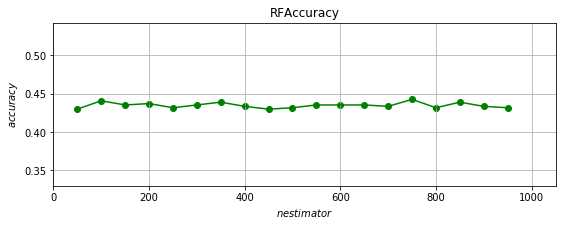

In [29]:
plt.figure(figsize=(9, 3))
plt.title('RFAccuracy')
plt.ylabel('$accuracy$')
plt.xlabel('$nestimator$')
plt.xlim(0, 1050)
plt.ylim(min(rf_gs.cv_results_['mean_test_score'])-0.1, max(rf_gs.cv_results_['mean_test_score'])+0.1)
plt.scatter(n_est,rf_gs.cv_results_['mean_test_score'], c='g')
plt.plot(n_est,rf_gs.cv_results_['mean_test_score'], c='g', dash_joinstyle='round')

plt.grid()
plt.show()

In [30]:
rf_gs=GridSearchCV(rf, params,scoring='f1_weighted',cv=3)
rf_gs.fit(X_train_2,y_train)
optimal_hyperparameters_rf_f=rf_gs.best_params_
print('optimal hyperparameters: '+str(rf_gs.best_params_))
print('best score: '+str(rf_gs.best_score_) )

optimal hyperparameters: {'n_estimators': 200}
best score: 0.44221476408336097


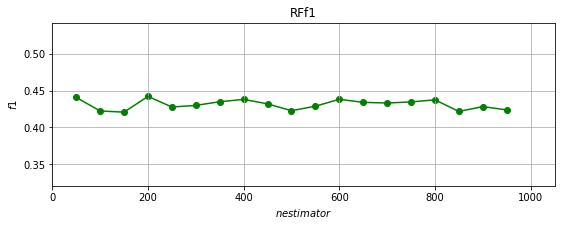

In [31]:
plt.figure(figsize=(9, 3))
plt.title('RFf1')
plt.ylabel('$f1$')
plt.xlabel('$nestimator$')
plt.xlim(0, 1050)
plt.ylim(min(rf_gs.cv_results_['mean_test_score'])-0.1, max(rf_gs.cv_results_['mean_test_score'])+0.1)
plt.scatter(n_est,rf_gs.cv_results_['mean_test_score'], c='g')
plt.plot(n_est,rf_gs.cv_results_['mean_test_score'], c='g', dash_joinstyle='round')

plt.grid()
plt.show()

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [34]:
# YOUR CODE HERE
def score_models(score,data):
    lr=LogisticRegression(multi_class='multinomial', solver='saga',
                                 tol=1e-3, max_iter=500, C=optimal_hyperparameters_lr['C'], 
                                 penalty=optimal_hyperparameters_lr['penalty'])
    tree=DecisionTreeClassifier(max_depth=optimal_hyperparameters_tr['max_depth']) 
    
    
    lr.fit(data[0],data[1])
    y_pred_lr=lr.predict(data[2])
    tree.fit(data[0],data[1])
    y_pred_tr=tree.predict(data[2])
    if (score=='f1'):       
        f1_lr=f1_score(data[3], y_pred_lr, average='weighted')       
        f1_tr=f1_score(data[3], y_pred_tr, average='weighted')
        rf_f=RandomForestClassifier(n_estimators=optimal_hyperparameters_rf_f['n_estimators'])
        rf_f.fit(data[0],data[1])
        y_pred_rf=rf_f.predict(data[2])
        f1_rf=f1_score(data[3], y_pred_rf, average='weighted')   
        return f1_lr,f1_tr,f1_rf
    if (score=='accuracy'):
        ac_lr=accuracy_score(y_test, y_pred_lr)
        ac_tr=accuracy_score(y_test, y_pred_tr)
        rf_ac=RandomForestClassifier(n_estimators=optimal_hyperparameters_rf_ac['n_estimators'])
        rf_ac.fit(data[0],data[1])
        y_pred_rf=rf_ac.predict(data[2])
        ac_rf=accuracy_score(y_test, y_pred_rf)
        return ac_lr,ac_tr,ac_rf

In [51]:
num=round(X_train.shape[0]/10)-1
ac_lr_all=[]
ac_tr_all=[]
ac_rf_all=[]
f_lr_all=[]
f_tr_all=[]
f_rf_all=[]
for i in range(10):
    data=[X_train[0:54+i*55],y_train[0:54+i*55],X_test,y_test]
    ac_lr,ac_tr,ac_rf=score_models('accuracy',data)
    ac_lr_all.append(ac_lr)
    ac_tr_all.append(ac_tr)
    ac_rf_all.append(ac_rf)
    f_lr,f_tr,f_rf=score_models('f1',data)
    f_lr_all.append(f_lr)
    f_tr_all.append(f_tr)
    f_rf_all.append(f_rf)
    

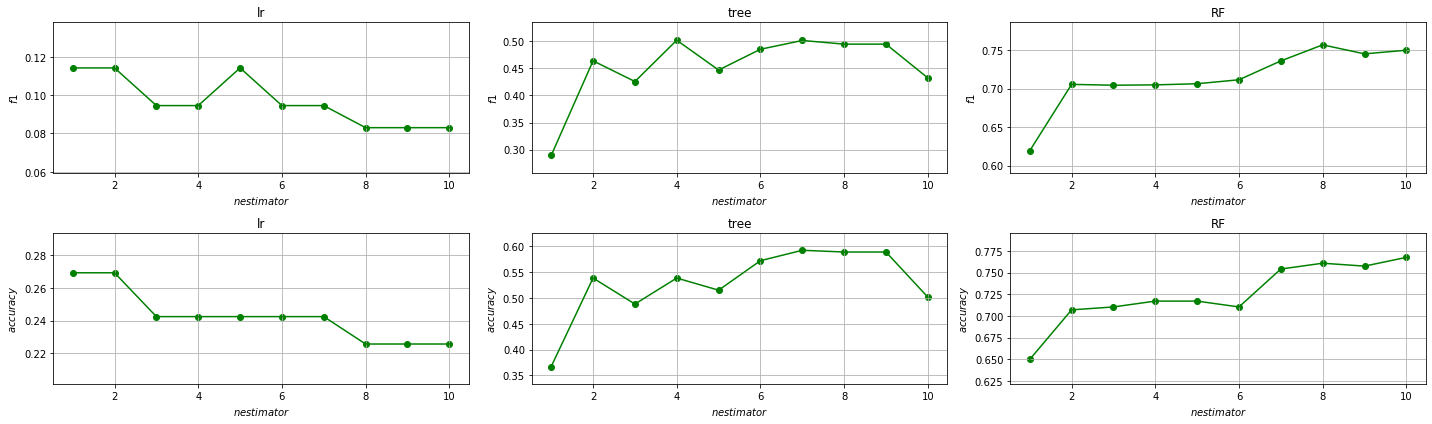

In [90]:
parts=np.arange(1,11)

fig,ax=plt.subplots(2,3,figsize=(20, 6))

for i in range(3):
    ax[0,i].grid()
    ax[0,i].set_ylabel('$f1$')
    ax[0,i].set_xlabel('$nestimator$')
    ax[1,i].grid()
    ax[1,i].set_ylabel('$accuracy$')
    ax[1,i].set_xlabel('$nestimator$')
ax[0,0].scatter(parts,f_lr_all, c='g')
ax[0,0].plot(parts,f_lr_all, c='g')
ax[0,0].set_title('lr')
ax[0,1].scatter(parts,f_tr_all, c='g')
ax[0,1].plot(parts,f_tr_all, c='g')
ax[0,1].set_title('tree')
ax[0,2].scatter(parts,f_rf_all, c='g')
ax[0,2].plot(parts,f_rf_all, c='g')
ax[0,2].set_title('RF')
ax[1,0].scatter(parts,ac_lr_all, c='g')
ax[1,0].plot(parts,ac_lr_all, c='g')
ax[1,0].set_title('lr')
ax[1,1].scatter(parts,ac_tr_all, c='g')
ax[1,1].plot(parts,ac_tr_all, c='g')
ax[1,1].set_title('tree')
ax[1,2].scatter(parts,ac_rf_all, c='g')
ax[1,2].plot(parts,ac_rf_all, c='g')
ax[1,2].set_title('RF')
plt.tight_layout()
